<a href="https://colab.research.google.com/github/bodejan/computer-vision/blob/main/01_MTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parctica 01: MTF del Ojo Humano

https://classroom.google.com/c/NjE3NjEyOTgwNzM0/a/NjE3NjEyOTgwNzc2/details

Tarea: *Genere un estímulo visual como el que se muestra en el archivo anexo. Debe especificar la función matemática que utilizó. Se aconseja especificar una senoidal con un barrido de frecuencia exponencial en el eje horizontal y una atenuación exponencial negativa del contraste en la dirección vertical. El barrido en frecuencias debe terminar con la frecuencia discreta más alta posible. Y la atenucióin del contraste debe ser sufuciente para que en la parte superior de la imagen ya no se perciba el contraste de la senoidal.*


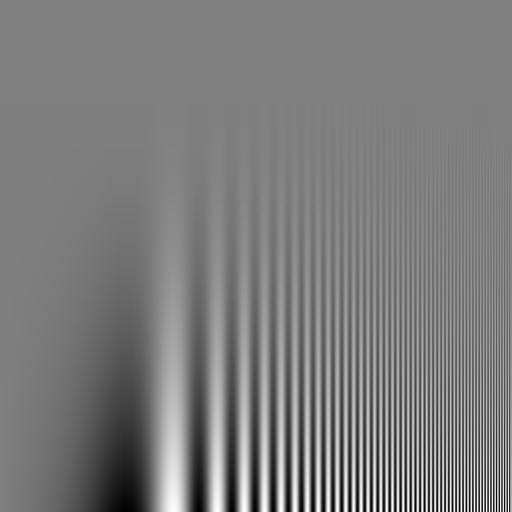

## La MTF

Especificamos una senoidal con un barrido de frecuencia exponencial en el eje horizontal ($f(x)$) para la luminosidad y una atenuación exponencial negativa del contraste en la dirección vertical ($f(y)$).



$$MTF(x, y) = f(x) \cdot f(y) \quad \text{(1)}$$

$$f(x) = \sin(\phi(x)) \quad \text{(2)}$$

$$\phi(x) = k_1 \cdot e^{k_2 \cdot x} \quad \text{(3)}$$

$$f(y) = e^{-k_3 \cdot y} \quad \text{(4)}$$

A continuación derivamos los parámetros $k_1, k_2,k_3$.






La derivada de (3) es:

$$\frac{d\phi(x)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot x} \quad \text{(4)}$$

Ademas sabemos que:

$$\frac{d\phi(0)}{dx} = \frac{2 \cdot \pi}{N_i} \quad \text{(4a)}$$

$$\frac{d\phi(511)}{dx} = 0.9 \cdot \pi \quad \text{(4b)}$$

(Frecuencia incial y final)

Asi podemos establecer la siguiente ecuación:

$$\frac{d\phi(0)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot 0} = k_1 \cdot k_2 = \frac{2 \cdot \pi}{N_i} \quad \text{(5)}$$

$$\frac{d\phi(511)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot 511} = 0.9 \cdot \pi \quad \text{(6)}$$


Resolvemos el sistema de ecuaciones (7) y (8) para encontrar $k_1, k_2$

(7) para $k_1$ nos da: $$k_1 = \frac{2 \cdot \pi}{N_i \cdot k_2} \quad \text{(5a)}$$

Sustituyendo el valor de $k_1$ en (6):

$$\frac{2 \cdot \pi}{N_i \cdot k_2} \cdot k_2 \cdot e^{k_2 \cdot 511} = 0.9 \cdot \pi \quad \text{(7)}$$

Simplificando

$$\frac{2}{N_i} \cdot e^{k_2 \cdot 511} = 0.9 \quad \text{(7a)}$$

Resolviendo (7a) para $k_2$

$$k_2 = \frac{\ln(0.9 \cdot N_i /2)}{511} \quad \text{(7b)}$$

Sustituyendo el valor de $k_2$ en (5a):

$$
k_1 = \frac{2 \cdot \pi}{N_i \cdot \left(\frac{\ln(0.9 \cdot \frac{N_i}{2})}{511}\right)} \quad \text{(8)}
$$

Simplificando

$$
k_1 = \frac{1022 \cdot \pi}{N_i \cdot \ln(0.9 \cdot \frac{N_i}{2})} \quad \text{(8a)}
$$


<!-- Usamos $N_i=100$ como consejo practico del profesor.

$$
k_2 = \frac{\ln(45)}{511} ≈ 0.0011574 \quad \text{(7c)}
$$

$$
k_1 = \frac{10.22 \cdot \pi}{\ln(45)} ≈ 10.2215 \quad \text{(8b)}
$$ -->


El parametro $k_3$ es un parametro libre.

Ultilizamos los valores derivados $k_1, k_2$ (con respecto a $N_i$) para calcular la MTF y crear un estimulo visual.

Para ello probamos diferentes valores de $N_1$ y $k_3$.

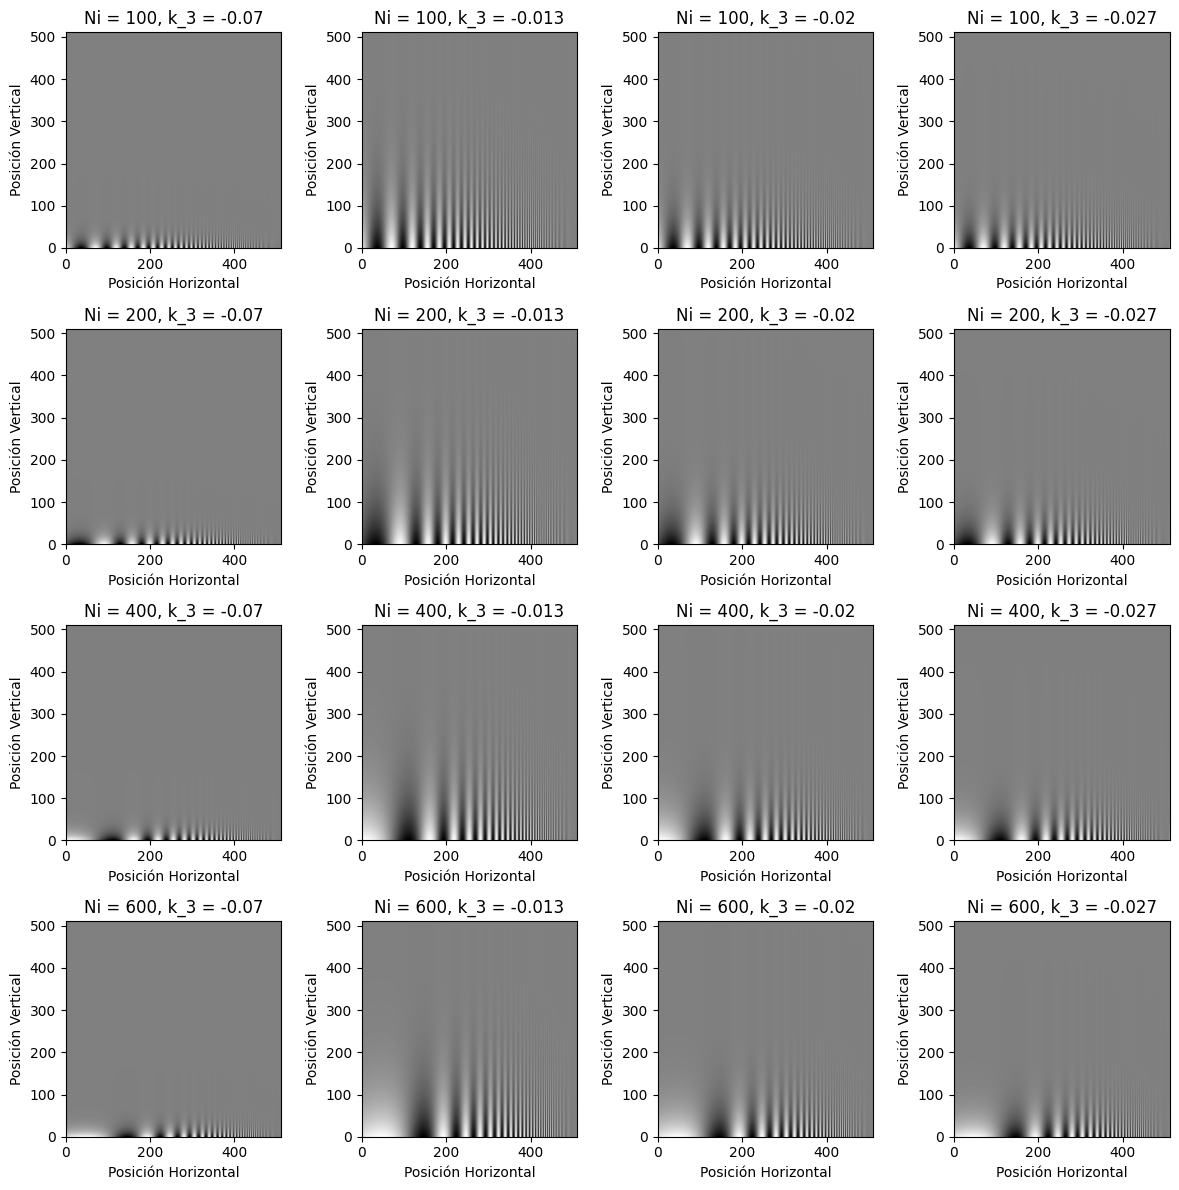

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
altura = 511
ancho = 511
fa = 0.90

# Valores de Ni y k_3 para iterar
ni_values = [100, 200, 400, 600]
k3_values = [-0.07, -0.013, -0.02, -0.027]

fig, axes = plt.subplots(len(ni_values), len(k3_values), figsize=(12, 12))

for i, Ni in enumerate(ni_values):
    for j, k_3 in enumerate(k3_values):
        k_1 = (1022*np.pi)/(Ni*np.log(fa*Ni/2))
        k_2 = np.log(fa*Ni/2)/511

        # Generar coordenadas para la imagen
        x = np.linspace(0, ancho, ancho+1)
        y = np.linspace(0, altura, altura+1)

        # Generar matrices de coordenadas para las frecuencias en el eje horizontal y la atenuación en el eje vertical
        xx, yy = np.meshgrid(x, y)

        # Generar la función senoidal con barrido de frecuencia y atenuación vertical
        f_x = np.sin(k_1*np.exp(k_2*xx))
        f_y = np.exp(-k_3*yy)

        # Aplicar la atenuación a la senoidal
        mtf = f_x * f_y

        # Mostrar la imagen generada en el subplot correspondiente
        ax = axes[i, j]
        ax.imshow(mtf, cmap='gray', origin='upper', extent=[0, ancho, 0, altura])
        ax.set_title(f'Ni = {Ni}, k_3 = {k_3}')
        ax.set_xlabel('Posición Horizontal')
        ax.set_ylabel('Posición Vertical')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Al final eligimos la version mas parecida con $N_i=400$ y $k_3 = -0.013$.

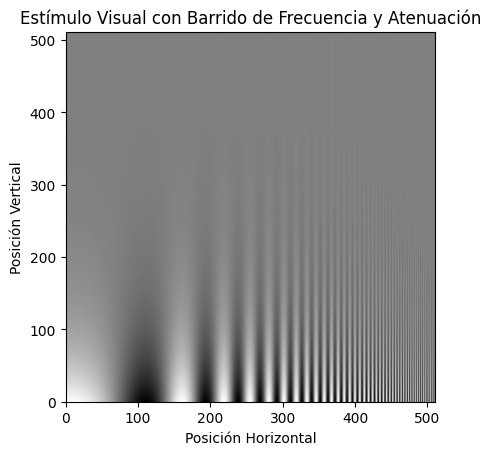

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
altura = 511
ancho = 511
Ni = 400
fa = 0.90
k_1 = (1022*np.pi)/(Ni*np.log(fa*Ni/2))
k_2 = np.log(fa*Ni/2)/511
k_3 = -0.013

# Generar coordenadas para la imagen
x = np.linspace(0, ancho, ancho+1)
y = np.linspace(0, altura, altura+1)

# Generar matrices de coordenadas para las frecuencias en el eje horizontal y la atenuación en el eje vertical
xx, yy = np.meshgrid(x, y)

# Generar la función senoidal con barrido de frecuencia y atenuación vertical
f_x = np.sin(k_1*np.exp(k_2*xx))
f_y = np.exp(-k_3*yy)

# Aplicar la atenuación a la senoidal
mtf = f_x * f_y

# Mostrar la imagen generada
plt.imshow(mtf, cmap='gray', origin='upper', extent=[0, ancho, 0, altura])
plt.title('Estímulo Visual con Barrido de Frecuencia y Atenuación')
plt.xlabel('Posición Horizontal')
plt.ylabel('Posición Vertical')
plt.show()